<a href="https://colab.research.google.com/github/masolanoo/x-rays/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#pre

In [7]:
from google.colab import drive 
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
! pip install kaggle
! mkdir ~/.kaggle
! cp drive/MyDrive/kaggle/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [9]:
# #etiquetas
# ! kaggle datasets download nih-chest-xrays/data -f Data_Entry_2017.zip

# #train_val_list.txt
# ! kaggle datasets download nih-chest-xrays/data -f train_val_list.zip

# #test_list.txt
# ! kaggle datasets download nih-chest-xrays/data -f test_list.zip

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go


Datos de las imágenes

In [11]:
df = pd.read_csv('Data_Entry_2017.csv')
df

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,30801,39,M,PA,2048,2500,0.168,0.168,NaN
112116,00030802_000.png,No Finding,0,30802,29,M,PA,2048,2500,0.168,0.168,NaN
112117,00030803_000.png,No Finding,0,30803,42,F,PA,2048,2500,0.168,0.168,NaN
112118,00030804_000.png,No Finding,0,30804,30,F,PA,2048,2500,0.168,0.168,NaN


In [12]:
df.shape

(112120, 12)

In [62]:
#encontrar lista de hallazgos/patologías posibles
labels = set() 
for i in pd.unique(df['Finding Labels']):
    labels.update(i.split('|'))

#quitar 'No Finding'
labels.remove('No Finding')

labels = list(labels)

unique_com = len(pd.unique(df['Finding Labels']))
print(f'Así, existen {unique_com} combinaciones de etiquetas únicas \ny {len(labels)} posibles condiciones: {labels}')

#crear nuevas columnas en el dataframe que representen cada una de estas etiquetas
for label in labels:
    df[label] = df['Finding Labels'].apply(lambda x: 1 if label in x else 0)


#revisar dataframe
df.loc[:,['Image Index', 'Finding Labels']+labels]

Así, existen 836 combinaciones de etiquetas únicas 
y 14 posibles condiciones: ['Pneumonia', 'Hernia', 'Effusion', 'Atelectasis', 'Mass', 'Fibrosis', 'Emphysema', 'Nodule', 'Edema', 'Pleural_Thickening', 'Cardiomegaly', 'Consolidation', 'Pneumothorax', 'Infiltration']


,Image Index,Finding Labels,Pneumonia,Hernia,Effusion,Atelectasis,Mass,Fibrosis,Emphysema,Nodule,Edema,Pleural_Thickening,Cardiomegaly,Consolidation,Pneumothorax,Infiltration
0,00000001_000.png,Cardiomegaly,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,00000001_001.png,Cardiomegaly|Emphysema,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,00000001_002.png,Cardiomegaly|Effusion,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,00000002_000.png,No Finding,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,00000003_000.png,Hernia,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,0,0,0,1,0,0,0,0,0,0,0,0,0
112116,00030802_000.png,No Finding,0,0,0,0,0,0,0,0,0,0,0,0,0,0
112117,00030803_000.png,No Finding,0,0,0,0,0,0,0,0,0,0,0,0,0,0
112118,00030804_000.png,No Finding,0,0,0,0,0,0,0,0,0,0,0,0,0,0


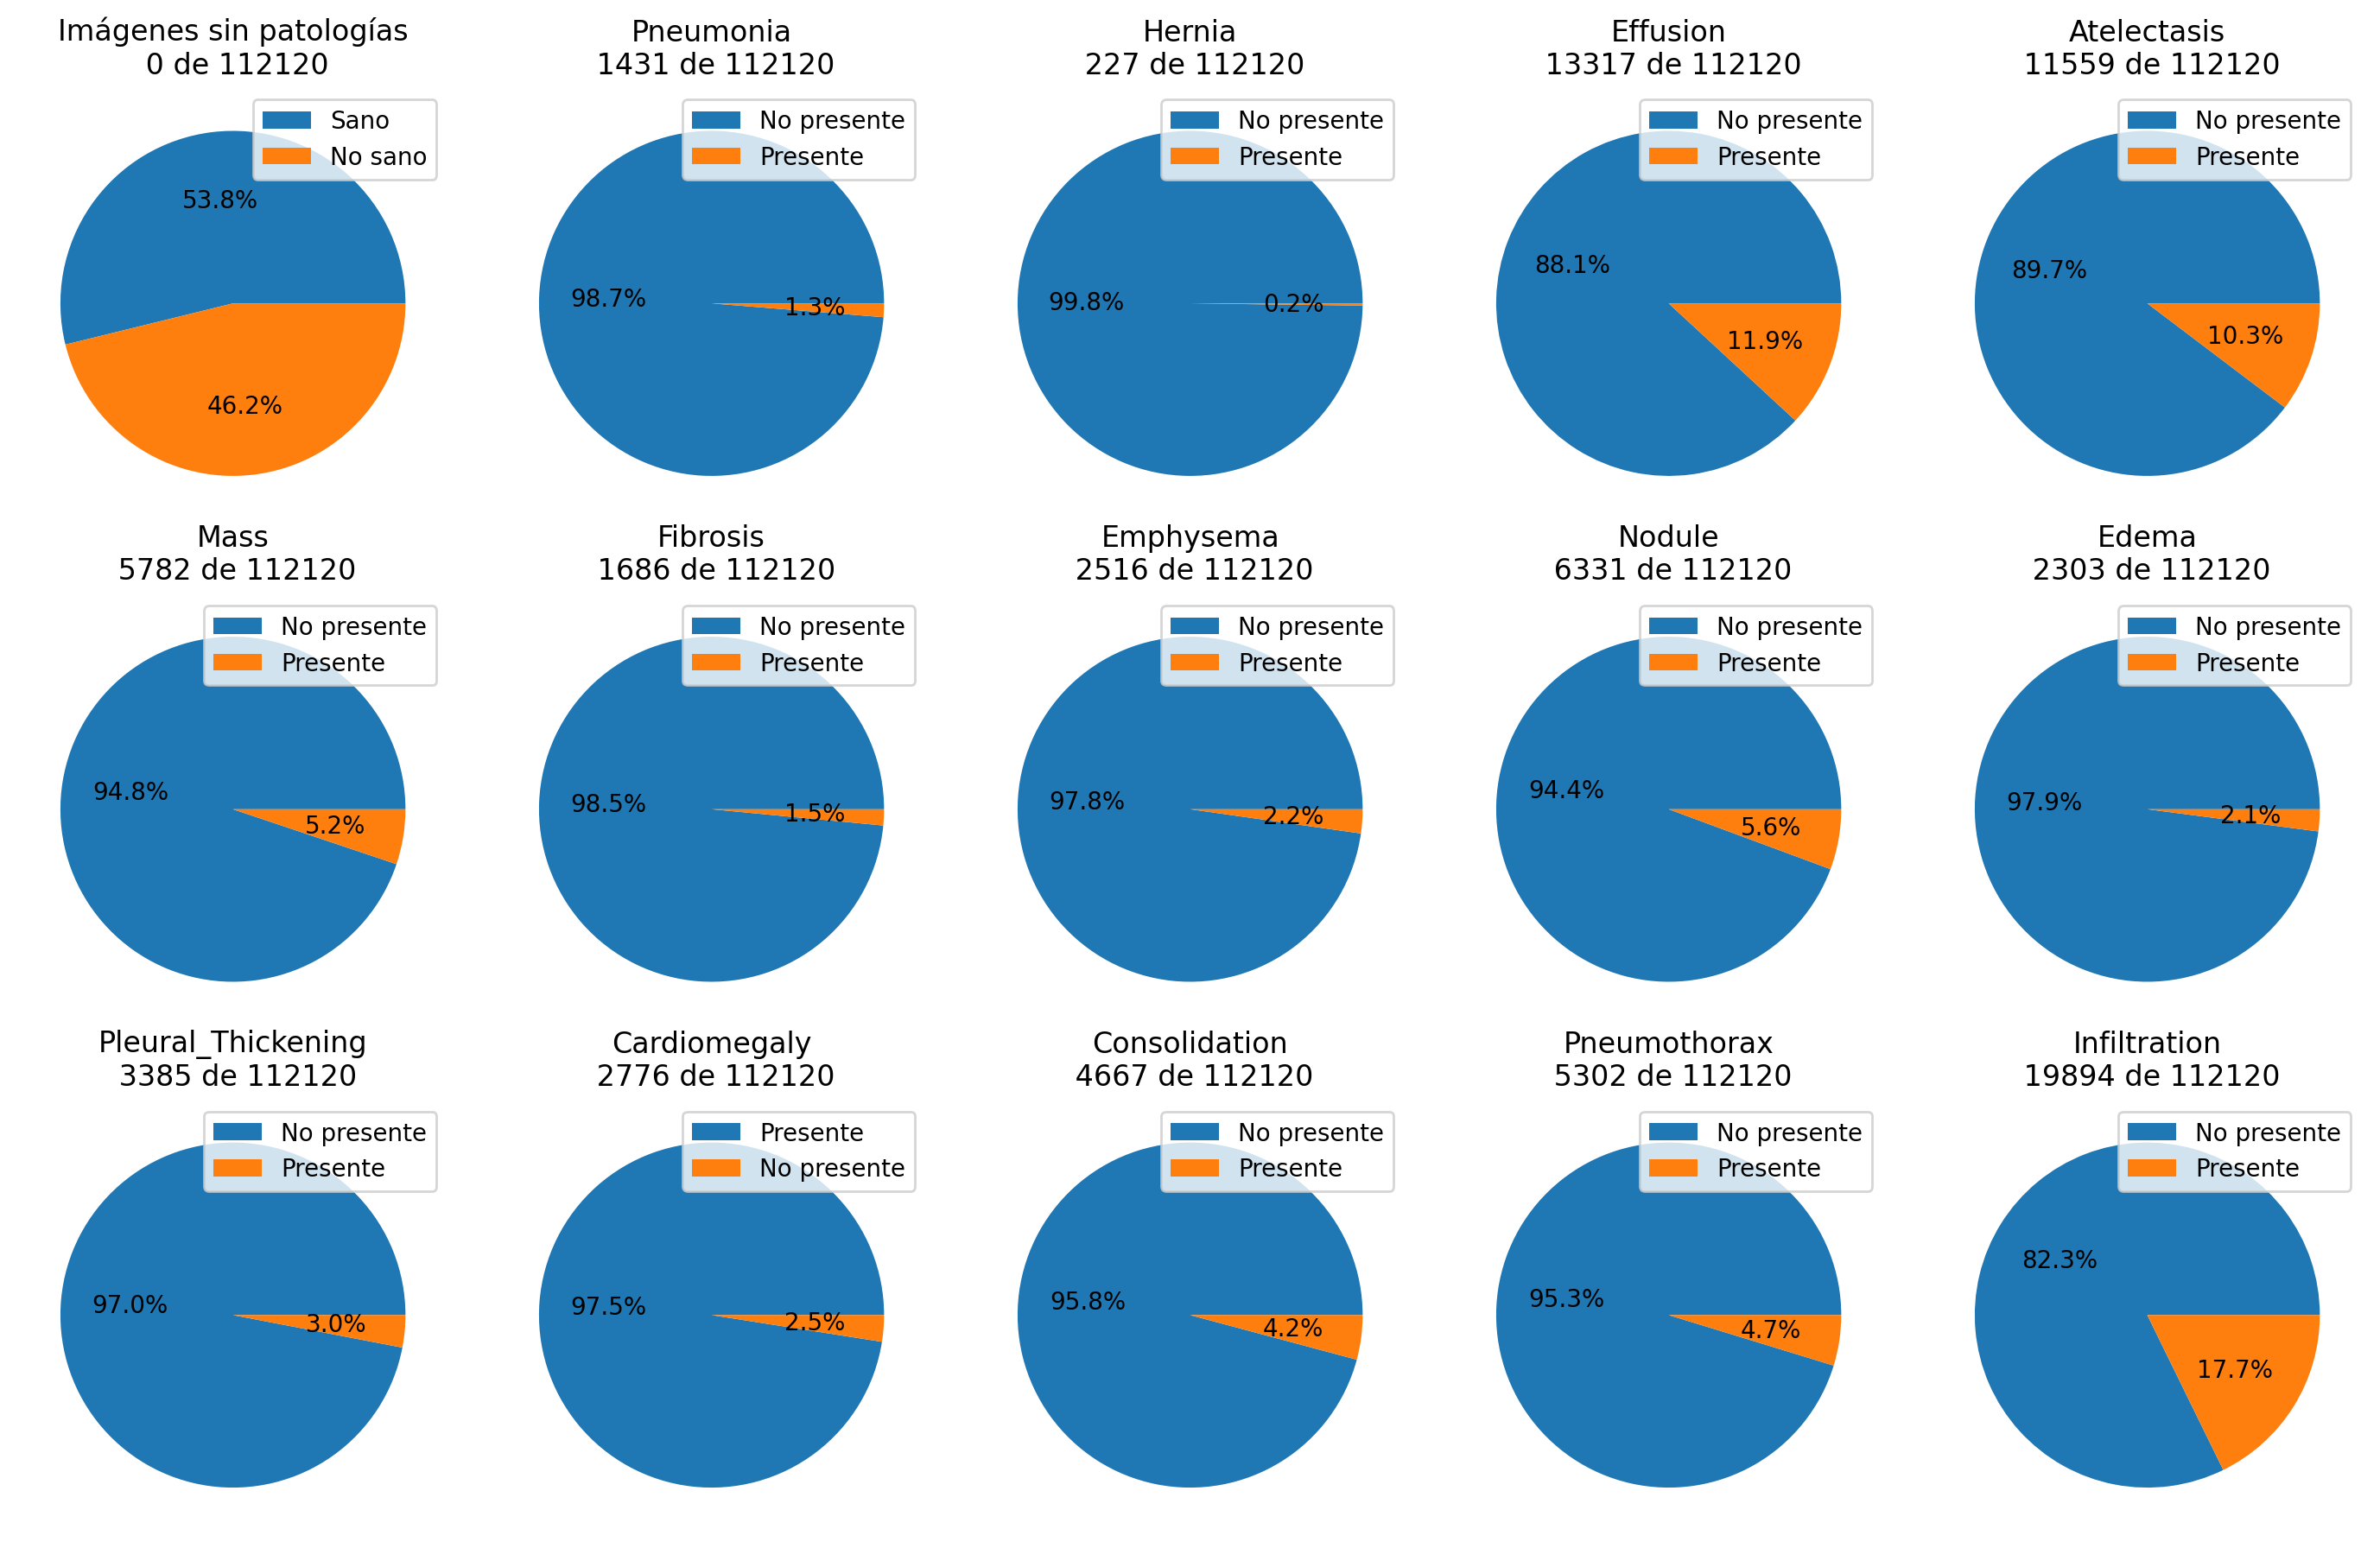

In [113]:
## pie chart

plt.rcParams['figure.dpi'] = 200


plt.figure(figsize=(14,9))
plt.subplot(3,5,1)
plt.pie(x=[len(df[df['Finding Labels'] == 'No Finding']), len(df[df['Finding Labels'] != 'No Finding'])],autopct='%1.1f%%')
plt.legend(['Sano', 'No sano'])
lensano = len(df[df['Finding Labels'] == 'No Finding '])
plt.title('Imágenes sin patologías' + f'\n {lensano} de {len(df)}' )

for i in range(len(labels)):
    plt.subplot(3,5,i+2)
    plt.pie(df[labels[i]].value_counts(),autopct='%1.1f%%')
    plt.legend(['Presente' if x == 1 else 'No presente' for x in df[labels[i]].unique()])
    plt.title(labels[i] + f'\n {len(df[df[labels[i]] == 1])} de {len(df)}')
plt.tight_layout()
plt.show()

No balanceado para ninguna categoría, solo para `Effusion`, `Atelectasis` e `Infiltration` supera el 10%






In [120]:
##  correlación

#dataframe de solo las patologías:
label_df=df.loc[:,['Image Index']+labels]
label_df.corr().style.background_gradient(cmap='coolwarm').format(precision=4)

,Pneumonia,Hernia,Effusion,Atelectasis,Mass,Fibrosis,Emphysema,Nodule,Edema,Pleural_Thickening,Cardiomegaly,Consolidation,Pneumothorax,Infiltration
Pneumonia,1.0000,0.0002,0.0243,0.0299,-0.0010,-0.0069,-0.0049,-0.0037,0.1740,0.0022,0.0028,0.0252,-0.0100,0.0730
Hernia,0.0002,1.0000,-0.0037,0.0108,0.0119,0.0075,-0.0015,-0.0024,-0.0023,0.0013,0.0018,-0.0054,-0.0016,-0.0038
Effusion,0.0243,-0.0037,1.0000,0.1724,0.0707,-0.0028,0.0112,0.0191,0.0621,0.0720,0.1301,0.1011,0.0476,0.1181
Atelectasis,0.0299,0.0108,0.1724,1.0000,0.0190,0.0111,0.0326,-0.0080,-0.0034,0.0252,0.0158,0.1089,0.0314,0.0931
Mass,-0.0010,0.0119,0.0707,0.0190,1.0000,0.0100,0.0232,0.1013,0.0029,0.0654,-0.0107,0.0746,0.0299,0.0140
Fibrosis,-0.0069,0.0075,-0.0028,0.0111,0.0100,1.0000,-0.0009,0.0225,-0.0132,0.0536,0.0048,0.0032,0.0001,0.0088
Emphysema,-0.0049,-0.0015,0.0112,0.0326,0.0232,-0.0009,1.0000,-0.0071,-0.0092,0.0264,-0.0071,-0.0005,0.1782,0.0004
Nodule,-0.0037,-0.0024,0.0191,-0.0080,0.1013,0.0225,-0.0071,1.0000,0.0003,0.0496,-0.0121,0.0318,0.0076,0.0427
Edema,0.1740,-0.0023,0.0621,-0.0034,0.0029,-0.0132,-0.0092,0.0003,1.0000,-0.0020,0.0283,0.0208,-0.0225,0.0942
Pleural_Thickening,0.0022,0.0013,0.0720,0.0252,0.0654,0.0536,0.0264,0.0496,-0.0020,1.0000,0.0091,0.0287,0.0317,0.0204
